#### Are certain genres more common among award-winning films?

Takeaway: dramas are much more common among award-winning films. Romance, history, and music films are also much more common among Oscar winners compared to their overall frequency. Action and adventure movies underperform among Oscar winners compared to their overall frequency.

In [356]:
import pandas as pd
import ast
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.pyplot
import seaborn as sns
import numpy as np

##### Importing Data

In [357]:
# Import TMDB data
tmdb_data = pd.read_csv(f'../data/movies_2015_2024.csv').drop_duplicates(subset=['Title','Year'])

# Import best picture data
best_picture = pd.read_csv('../data/best_picture.csv')
# Add a 'Nominee' column
best_picture['Nominee']='Yes'

In [358]:
# Merge best picture data and TMDB API data into a single DataFrame
movies_df = best_picture.merge(tmdb_data, how='outer', on=['Title','Year'], validate='1:1')

# Filter to just 2015-2024
movies_df = movies_df[movies_df['Year']>=2015]

# Fill NaN values
values = {'Winner': 'No', 'Nominee': 'No'}
movies_df = movies_df.fillna(value=values)

In [359]:
# Convert Genre column to list type so that it can be exploded
movies_df['Genre'] = movies_df['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

# Explode the movies_df DataFrame by genre
movies_df_exploded = movies_df.explode('Genre')

##### Visualization

In [360]:
overall_genre_count = movies_df_exploded.value_counts('Genre', normalize=True).reset_index()
overall_genre_count['Category']='Overall'
oscar_genre_count = movies_df_exploded[movies_df_exploded['Winner']=='Yes'].value_counts('Genre', normalize=True).reset_index()
oscar_genre_count['Category']='Oscar'
genre_frequencies = pd.concat([overall_genre_count, oscar_genre_count])

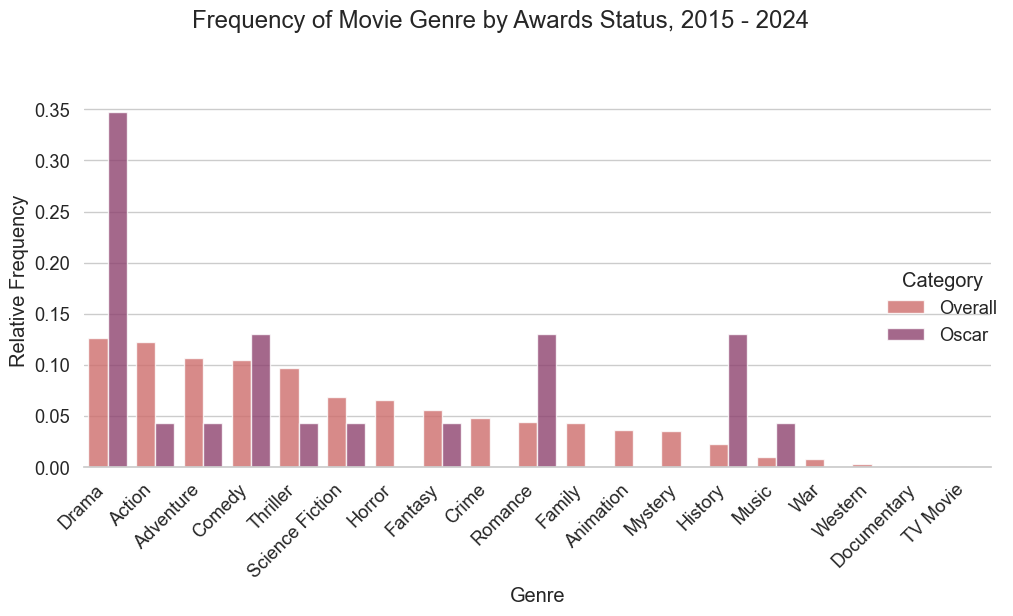

In [361]:
# Draw a side by side barplot showing genre frequency for Oscar winners and overall
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.2) 
ax = sns.catplot(
    data=genre_frequencies, kind="bar",
    x="Genre", y="proportion", hue="Category",
    alpha=.8, height=6, aspect=1.5, # Adjust aspect for a wider plot
    palette='flare' 
)
ax.fig.suptitle("Frequency of Movie Genre by Awards Status, 2015 - 2024", y=1.03) 
ax.set_axis_labels("Genre", "Relative Frequency")
ax.set_xticklabels(rotation=45, ha='right')
plt.tight_layout() 
ax.despine(left=True) 
plt.show()

In [362]:
# Represent the same data using a pair of pie charts

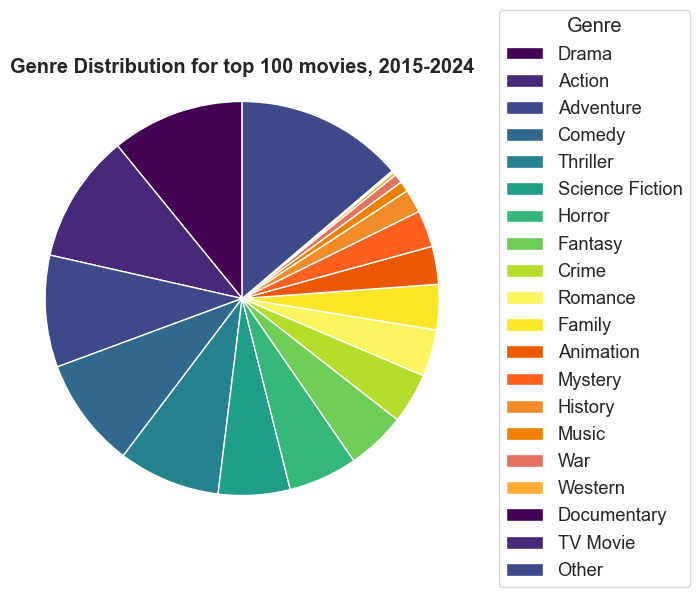

In [390]:
plt.figure(figsize=(5,5))
#, autopct='%1.1f%%'
colors = [
    '#440154', 
    '#482878',  
    '#3e4989',  
    '#31688e',  
    '#26828e',  
    '#1f9e89',  
    '#35b779',  
    '#6ece58',  
    '#b5de2b',  
    '#FCF55F',
    '#fde724',
    '#EC5800',
    '#FF5F1F',
    '#F28C28',
    '#F08000',
    '#E3735E',
    '#FFAA33'
]
plt.pie(overall_genre_count['proportion'],startangle=90, colors=colors)
plt.title('Genre Distribution for top 100 movies, 2015-2024', fontweight = 'bold')
plt.tight_layout() 
plt.axis('equal')
plt.legend(overall_genre_count['Genre'], title="Genre", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [364]:
# Grouping smaller genres into an 'other' slice
other_prop = overall_genre_count[overall_genre_count['proportion']<0.044554]['proportion'].sum()
overall_genre_count.loc[len(overall_genre_count)] = {'Genre': 'Other', 'proportion': other_prop, 'Category': 'Overall'}

# List of genres to keep
genres_to_keep = ['Drama','Action','Adventure','Comedy','Thriller','Horror','Fantasy','Crime','Romance','Science Fiction','Other']

# Filter the DataFrame to keep only the specified indexes
df_filtered = overall_genre_count[overall_genre_count['Genre'].isin(genres_to_keep)]

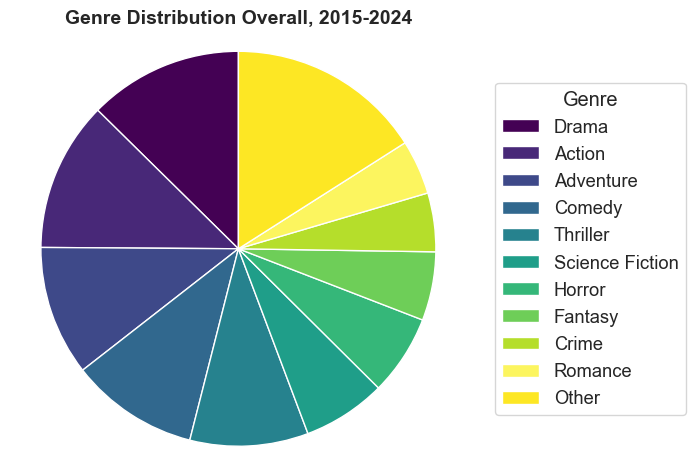

In [399]:
plt.figure(figsize=(5,5))
#, autopct='%1.1f%%' if we want to add percentages to each slice
colors = [
    '#440154', 
    '#482878',  
    '#3e4989',  
    '#31688e',  
    '#26828e',  
    '#1f9e89',  
    '#35b779',  
    '#6ece58',  
    '#b5de2b',  
    '#FCF55F',
    '#fde724'
]
plt.pie(df_filtered['proportion'],startangle=90, colors=colors)
plt.title('Genre Distribution Overall, 2015-2024', fontweight = 'bold', fontsize=14)
plt.tight_layout() 
plt.axis('equal')
plt.legend(df_filtered['Genre'], title="Genre", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.savefig(
    '../assets/Genre_dist_overall',
    dpi=150, bbox_inches='tight'
)

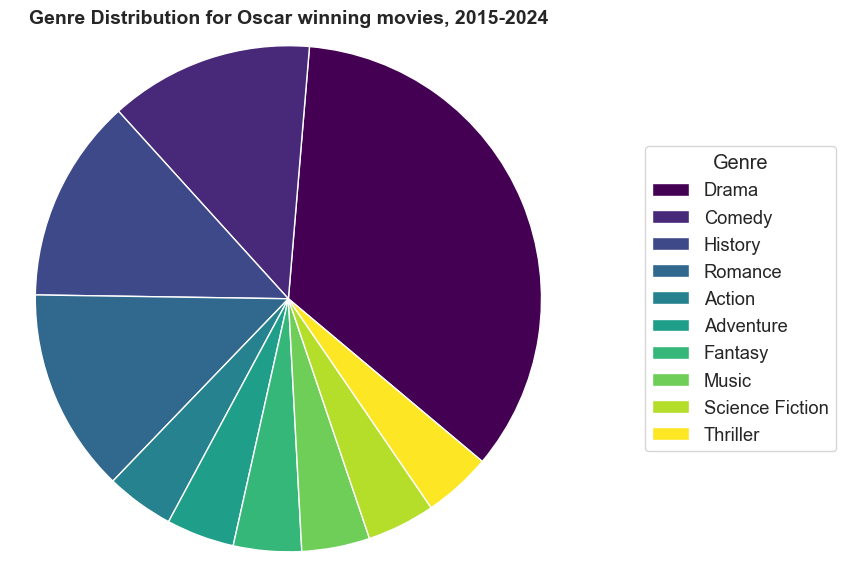

In [400]:
plt.figure(figsize=(6,6))
#, autopct='%1.1f%%' if we want to add percentages to each slice
colors = [
    '#440154', 
    '#482878',  
    '#3e4989',  
    '#31688e',  
    '#26828e',  
    '#1f9e89',  
    '#35b779',  
    '#6ece58',  
    '#b5de2b',  
    '#fde724'  
]

plt.pie(oscar_genre_count['proportion'],startangle=320, colors=colors)
plt.title('Genre Distribution for Oscar winning movies, 2015-2024', fontweight = 'bold',fontsize=14)
plt.tight_layout() 
plt.axis('equal')
plt.legend(oscar_genre_count['Genre'], title="Genre", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.savefig(
    '../assets/Genre_dist_oscar_winners',
    dpi=150, bbox_inches='tight'
)